## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\Users\lucca\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [5]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [11]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,71
O MSE da árvore com profundidade=8 é: 0,98


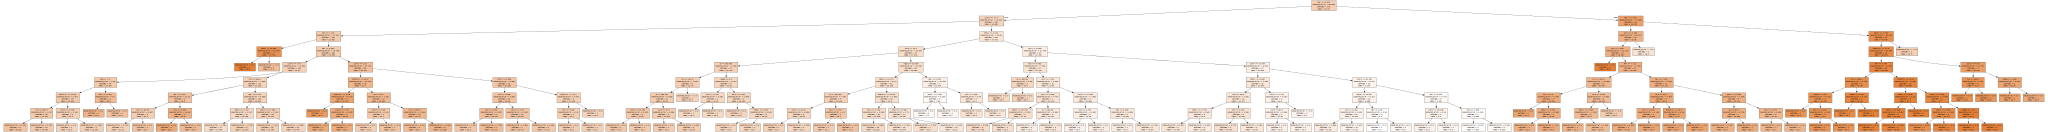

In [12]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [30]:
regr_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=6)

regr_2.fit(X_train, y_train)

mse2 = regr_2.score(X_test, y_test)
mse2

0.7414374943417663

In [35]:
regr_1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=6)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.7422357052752666

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035
3,0.607844,0.608277,0.596417,0.625875,0.634217,0.645757,0.645757,0.645757
4,0.692832,0.672232,0.676667,0.627247,0.682184,0.665746,0.658618,0.658618
5,0.746096,0.728635,0.728312,0.681329,0.738481,0.717710,0.710582,0.702706
6,0.743551,0.732142,0.731409,0.664891,0.722680,0.722235,0.717054,0.709117
7,0.743005,0.729167,0.726515,0.664906,0.740812,0.722963,0.718808,0.705538
8,0.749043,0.727207,0.730650,0.675880,0.734862,0.736544,0.722554,0.708404


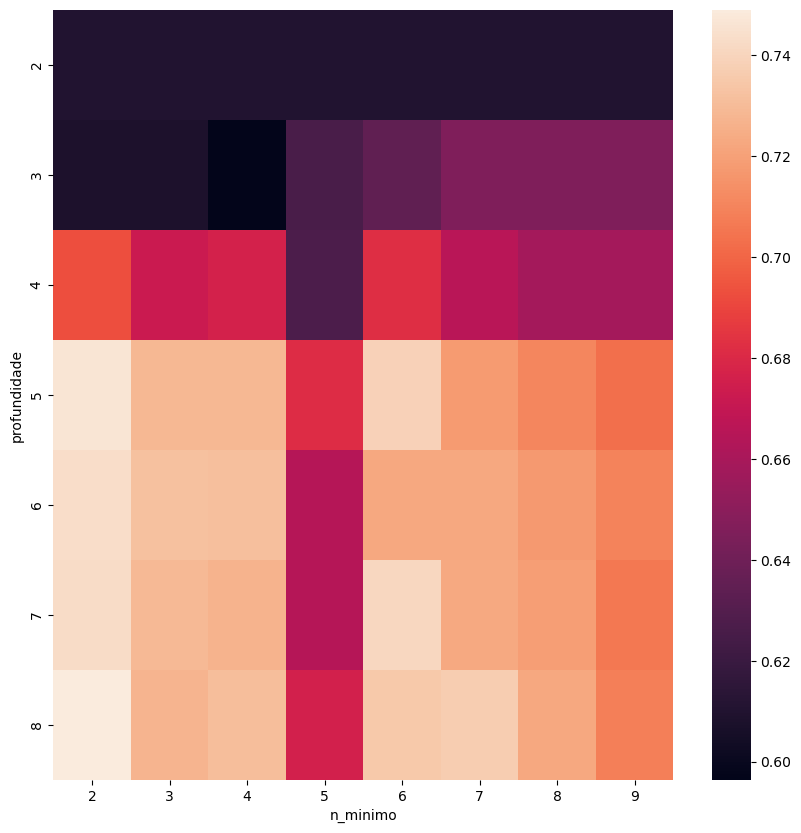

In [39]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

n_minimo,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
profundidade,,,,,,,,,,,,,,,,,,,,,
1,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,...,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163
2,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,...,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035
3,0.607844,0.608277,0.596417,0.625875,0.634217,0.645757,0.645757,0.645757,0.645757,0.646825,...,0.633841,0.633841,0.633841,0.633841,0.633841,0.633841,0.633841,0.649247,0.649247,0.655952
4,0.617247,0.672232,0.676667,0.627247,0.682184,0.665746,0.658618,0.658618,0.658618,0.675995,...,0.658864,0.658864,0.658864,0.656773,0.656773,0.656773,0.656773,0.667287,0.678392,0.683045
5,0.746096,0.728635,0.728312,0.681329,0.738481,0.717710,0.710582,0.702706,0.702706,0.720175,...,0.703893,0.703161,0.704923,0.704621,0.700095,0.694126,0.694126,0.690372,0.701477,0.704759
6,0.739480,0.732195,0.731462,0.664891,0.722680,0.722235,0.717054,0.709117,0.707208,0.726767,...,0.710532,0.705662,0.707847,0.707545,0.701806,0.698014,0.698260,0.699043,0.710285,0.705984
7,0.748701,0.729167,0.726515,0.664906,0.740846,0.722963,0.718808,0.705538,0.710841,0.732575,...,0.713465,0.708857,0.709954,0.709652,0.703913,0.700120,0.698260,0.699043,0.710285,0.705984
8,0.675472,0.727207,0.730597,0.676645,0.734130,0.736544,0.722554,0.708404,0.714100,0.736191,...,0.713465,0.708857,0.709954,0.709652,0.703913,0.700120,0.698260,0.699043,0.710285,0.705984


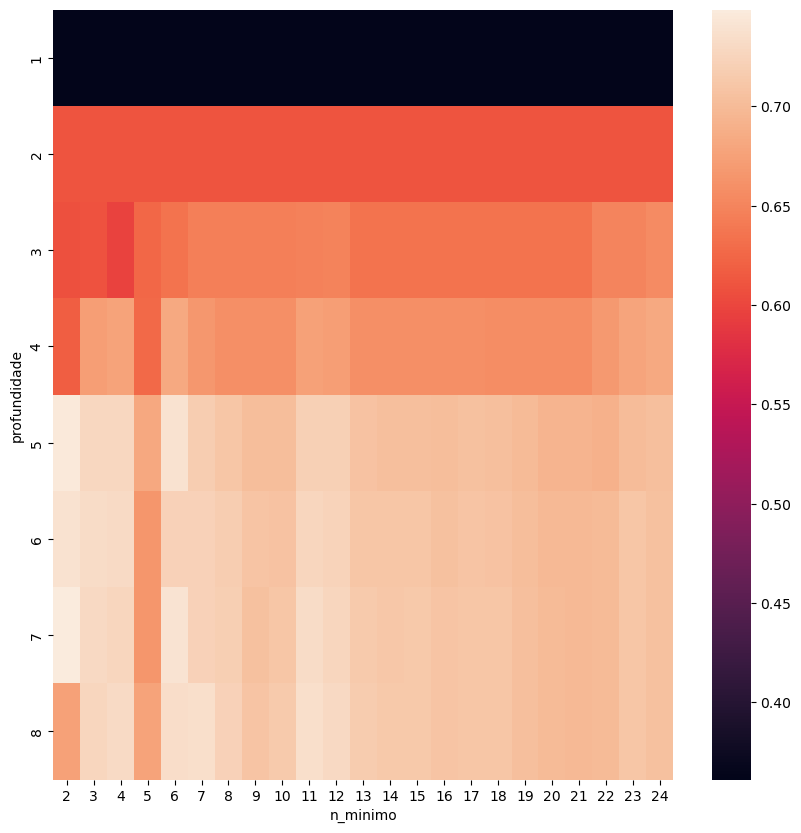

In [38]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(2, 25):
        regr_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_2.fit(X_train, y_train)
        mse2 = regr_2.score(X_test, y_test)
        mses.append(mse2)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [40]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  0.1081051 ,  0.385877  ,  0.43581444,  0.54272103,
         0.63978967,  1.09169481,  2.78056299,  4.41261817,  5.28170375,
        17.06061075, 41.67185681]),
 'impurities': array([15.4520679 , 15.560173  , 15.94605   , 16.38186444, 16.92458547,
        17.56437514, 18.65606995, 21.43663294, 25.84925111, 31.13095486,
        48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

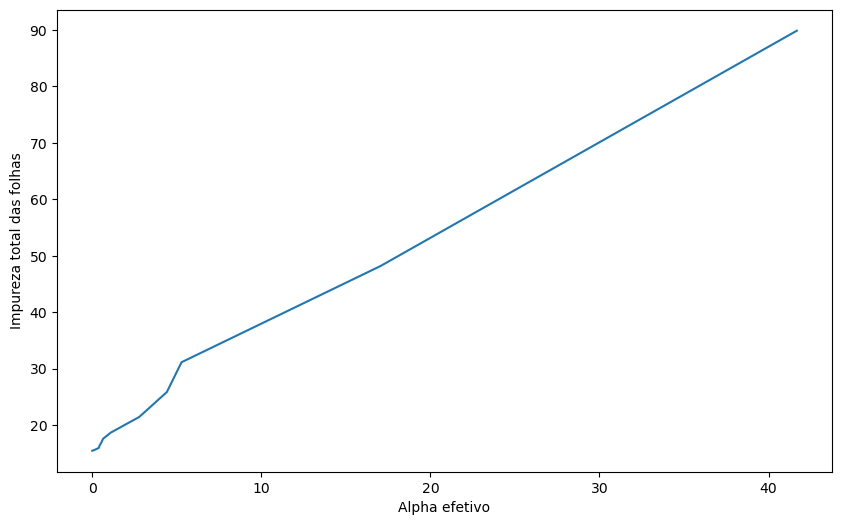

In [41]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [42]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

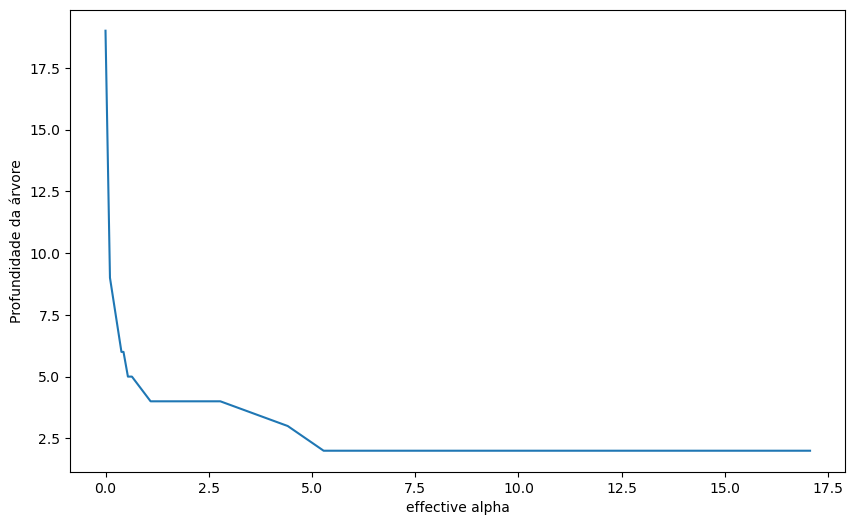

In [43]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [54]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.015)
arvore_final.fit(X_train, y_train)

print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

Profundidade: 14
R-quadrado na base de testes: 0.60
MSE na base de testes: 27.33


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [57]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

print(train_scores)
print(test_scores)

[0.0, 3.6301152326394552, 7.2154333341291395, 7.2154333341291395, 8.161545364838522, 9.823506002040132, 13.79799647328225, 18.131014486985848, 21.188119686984503, 31.130954861711388, 31.130954861711388, 48.19156561142086]
[27.316456692913388, 27.18485407158556, 25.41219597271116, 25.41219597271116, 26.238759771055033, 26.181836338686267, 23.016074412526542, 23.181250850285092, 27.329264791917506, 31.848059230059402, 31.848059230059402, 43.35036687648702]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

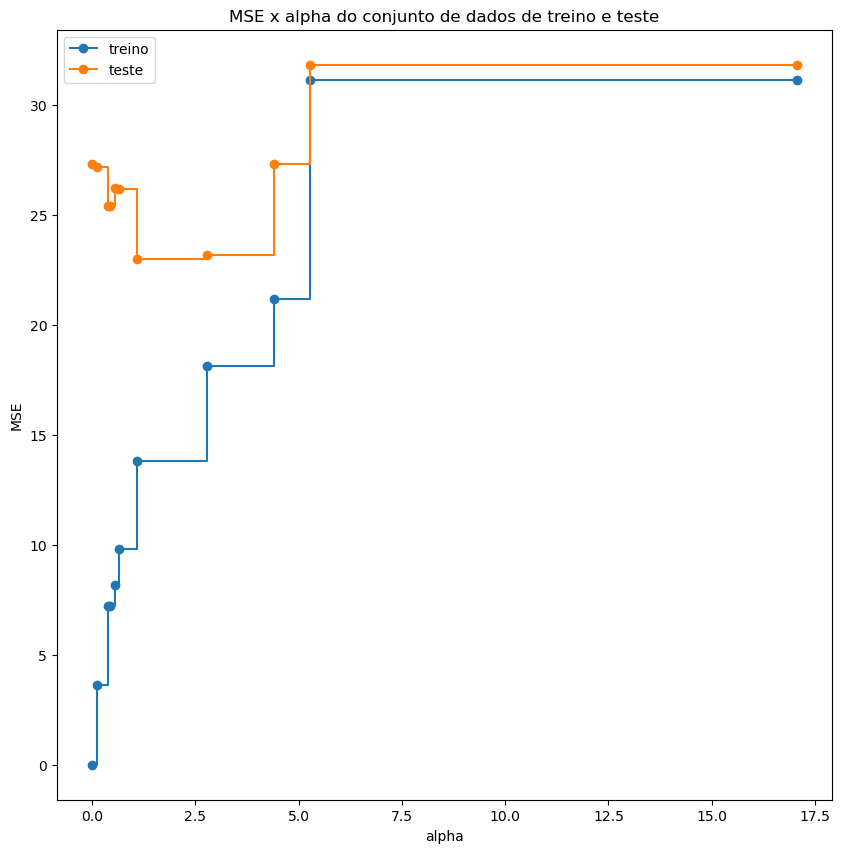

In [59]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [77]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.021)

arvore_final.fit(X_train, y_train)

print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

Profundidade: 14
R-quadrado na base de testes: 0.60
MSE na base de testes: 27.21


### 7. Visualize esta árvore.

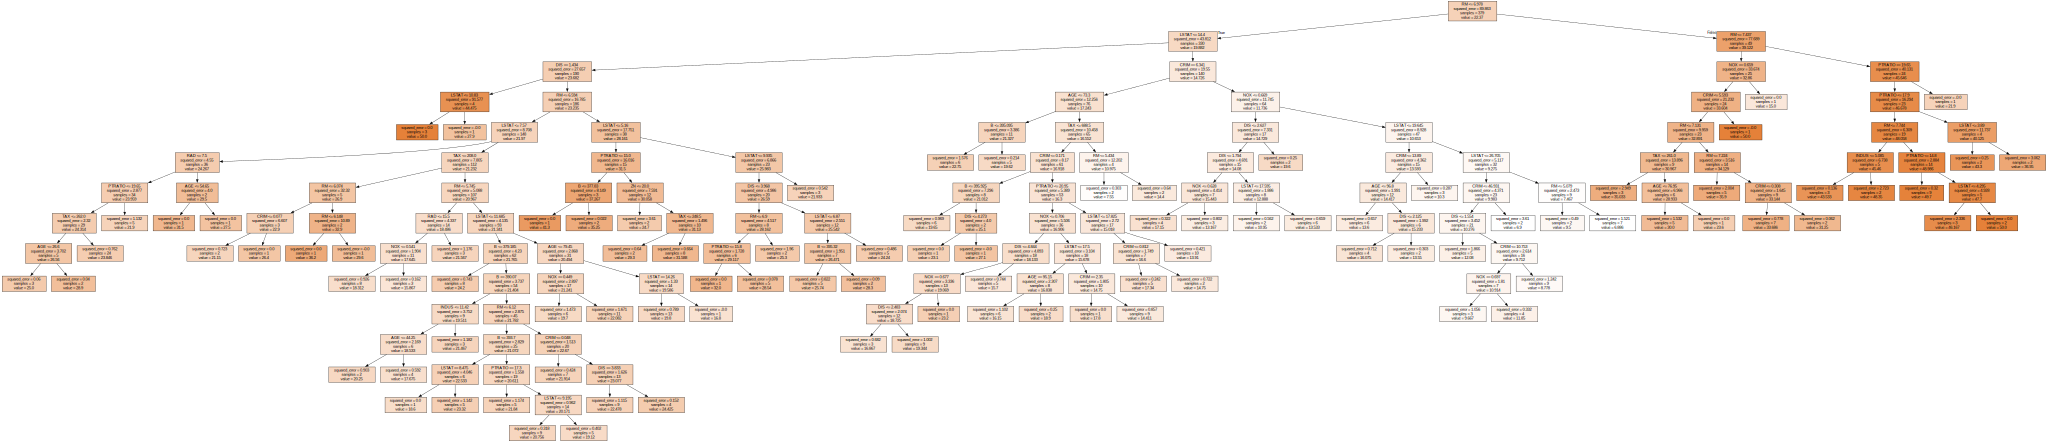

In [78]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(arvore_final, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph